In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r'C:\Users\gustavo.aguiar\Dados\all-stocks-5yr.csv')
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [20]:
companies = df.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [21]:
z = df.loc[df['Name'] == 'ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [22]:
z.head()

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [23]:
trainingd = z.iloc[:, 4:5].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [25]:
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [26]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.08995937 0.09402205 0.10330818 0.09963242 0.09421552 0.10795125
 0.10524279 0.08357516 0.08047978 0.08106017 0.07100019 0.07041981
 0.07583672 0.09769781 0.11994583 0.11510931 0.11394854 0.10543625
 0.11917199 0.11007932 0.11182047 0.10485587 0.10833817 0.12071967
 0.09750435 0.08589669 0.08512285 0.09885858 0.09808474 0.0913136
 0.07854517 0.07951248 0.08396208 0.09673051 0.08106017 0.08028632
 0.0798994  0.06655059 0.06887212 0.08744438 0.09750435 0.09189398
 0.09208744 0.09344167 0.07428903]


0.0930547494679822


In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [28]:
model = Sequential() 

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
38/38 [==============================] - 31s 294ms/step - loss: 0.0196
Epoch 2/25
38/38 [==============================] - 10s 263ms/step - loss: 0.0024
Epoch 3/25
38/38 [==============================] - 10s 265ms/step - loss: 0.0021
Epoch 4/25
38/38 [==============================] - 11s 282ms/step - loss: 0.0020
Epoch 5/25
38/38 [==============================] - 10s 267ms/step - loss: 0.0020
Epoch 6/25
38/38 [==============================] - 12s 318ms/step - loss: 0.0022
Epoch 7/25
38/38 [==============================] - 14s 365ms/step - loss: 0.0017
Epoch 8/25
38/38 [==============================] - 13s 339ms/step - loss: 0.0016
Epoch 9/25
38/38 [==============================] - 14s 378ms/step - loss: 0.0016
Epoch 10/25
38/38 [==============================] - 13s 325ms/step - loss: 0.0017
Epoch 11/25
38/38 [==============================] - 12s 307ms/step - loss: 0.0022
Epoch 12/25
38/38 [==============================] - 12s 328ms/step - loss: 0.0020
Epoch 13/25
3

In [30]:
test_set = df.loc[df['Name'] == 'BA']
test_set = test_set.loc[:, test_set.columns=='close']

In [31]:
y_test = test_set.iloc[timestamp:,0:].values

In [32]:
closing_price = test_set.iloc[:,0:].values
closing_price_scaled = sc.transform(closing_price)

In [33]:

x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i,0])

x_test = np.array(x_test)
x_test.shape

(1214, 45)

In [34]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1214, 45, 1)

In [35]:
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)


38/38 [==============================] - 12s 84ms/step


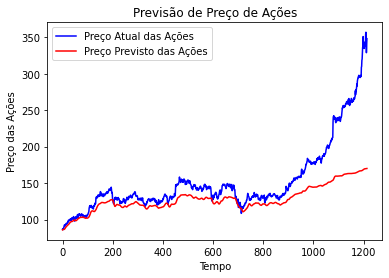

In [36]:
plt.plot(y_test, color='blue', label='Preço Atual das Ações')
plt.plot(predicted_price, color='red', label='Preço Previsto das Ações')
plt.title('Previsão de Preço de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()